# Project: Clean and Analyze Employee Exit Surveys 


Hello and welcome to our project. Here we will work with exit surveys from employees of the [Department of Education, Training and Employment (DETE)](https://www.data.qld.gov.au/dataset/employee-exit-survey-dete) and the Technical and Further Education (TAFE) institute, located in Queensland, Australia. Unfortunately, the original TAFE survey data is no longer available. Our datasets have been slightly modified from their original versions to make them easier to handle, encoding has been changed to a more friendly one, etc. Data has been last updated in March 2014.

In this project, we will analyse the data to determine the following:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In order to do this, we will first have to combine both datasets and clean up the data. After those steps have been completed, we will focus on the analysis and hopefully create some nice-looking charts which will lead us to good quality conclusions.

Below is our data dictionary for the `dete_survey.csv`:

* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE

Below is the data dictionary for the `tafe_survey.csv`:

* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

As always, let's start by importing our libraries and reading in the `.csv` files:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



dete = pd.read_csv('dete_survey.csv')
tafe = pd.read_csv('tafe_survey.csv')

In [2]:
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
dete.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
tafe.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
tafe.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

One of the first things we can notice in the DETE dataframe is that there are some rows containing 'Not Stated'. We can go ahead and replace those values with NaN, but let's check which columns contain the mentioned value. We will use a handy expression that we found on [StackOverflow](https://stackoverflow.com/questions/50923707/get-column-name-which-contains-a-specific-value-at-any-rows-in-python-pandas)

In [8]:
dete.columns[dete.isin(['Not Stated']).any()]

Index(['Cease Date', 'DETE Start Date', 'Role Start Date', 'Region'], dtype='object')

So, we can see that there are 4 columns containing the 'Not Stated' value.

Secondly, there are more than a few columns which are redundant for our analysis, so we can drop them. For example, we will drop: 

In [9]:
dete.columns[23:49]

Index(['Ill Health', 'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Information',
       'Kept informed', 'Wellness programs', 'Health & Safety'],
      dtype='object')

In [10]:
tafe.columns[17:66]

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

We can drop all these columns for start, since these go too deep and are not of value for our analysis. We only need to determine whether there was any kind of dissatisfaction as a reason for leaving, so we don't need to dig too deep into aprticular dissatisfaction reasons for this analysis.

Since we have determined our first 2 steps, let's do them:

## Replacing Not Stated with Nan

The best way to do this operation is to read the `csv` file again, but this time we will set the `na_values` parameter to `Not Stated` in the `pd.read_csv()` function:

In [11]:
dete = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [12]:
dete[['Cease Date', 'DETE Start Date', 'Role Start Date', 'Region']].isnull().sum()

Cease Date          34
DETE Start Date     73
Role Start Date     98
Region             105
dtype: int64

Since we have determined which columns contained Not Stated values, we can now confirm above that these have been read as NaN's

## Dropping unneccessary columns

Now, let's drop columns we don't need, as determined couple of steps above:

In [13]:
dete_updated = dete.drop(dete.columns[28:49], axis=1)
dete_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

We have reduced the number of columns in `dete_updated` dataframe from 56 to 35. Let's drop columns from `tafe`:

In [14]:
tafe_updated = tafe.drop(tafe.columns[17:66], axis=1)
tafe_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

Number of rows in tafe has now been reduced from 72 to 23, much better!

## Cleaning column names

We can see that both. datasets have columns which contain the same information, but the column names differ. Since we wil have to combine these 2 datasets, we need to standardize the column names. We can do that quickly and all at once using the df.columns attribute along with the vectorized string methods.

We will have the following criteria for column nomenclature:
* capitalization to be lowercase
* remove any trailing whitespace from the end of strings
* replace spaces with underscores (pothole case)

In [15]:
dete_updated.columns = dete_updated.columns.str.lower().str.replace(' ','_').str.replace('\s+','').str.strip()

In [16]:
dete_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separationtype                       822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

Looks good. `separationtype` is the only column name that is poking me in the eye, so let's add an underscore between the 2 words to conform to our standards:

In [17]:
dete_updated.columns = dete_updated.columns.str.replace('separationtype', 'separation_type')

In [18]:
dete_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   822 non-null    int64  
 1   separation_type                      822 non-null    object 
 2   cease_date                           788 non-null    object 
 3   dete_start_date                      749 non-null    float64
 4   role_start_date                      724 non-null    float64
 5   position                             817 non-null    object 
 6   classification                       455 non-null    object 
 7   region                               717 non-null    object 
 8   business_unit                        126 non-null    object 
 9   employment_status                    817 non-null    object 
 10  career_move_to_public_sector         822 non-null    bool   
 11  career_move_to_private_sector   

Now it is perfect! Let's move to `tafe` dataframe:

Since `tafe_updated` dataframe has quite different names, we cannot use `.columns` attribute and vectorized string methods, but rather we have to rename each individual column with the `df.rename()` method. We will start with only a couple of columns, since these are pretty obvious and we can easily match them with the columns in `dete_updated`:

In [19]:
tafe_updated = tafe_updated.rename({
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separation_type',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}, axis=1)
tafe_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   702 non-null    float64
 1   Institute                                            702 non-null    object 
 2   WorkArea                                             702 non-null    object 
 3   cease_date                                           695 non-null    float64
 4   separation_type                                      701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   437 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  437 non-null    object 
 8   Contributing Factors. Ill Health                     437 non-null    o

We see that our renaming has succeeded and now we have 9 columns matched with both datasets.

## Filtering the data

Let's explore the `separation_type` column in both datasets to have a better insight of what it containss:

In [20]:
dete_updated['separation_type'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64

In [21]:
tafe_updated['separation_type'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separation_type, dtype: int64

We can see that `dete_updated` contains various reasons for resignation. We can group them together under one name - `Resignation`.

In order to do that, let's first clean up all the row values that contain the word Resignation. We can see that they all have the same format: Resignation-Some Reason. We can use the str.split() method to split all the values on the dash, and then select only the first list element:

In [22]:
dete_updated['separation_type'] = dete_updated['separation_type'].str.split('-').str[0]

Let's confirm taht this method worked as intended:

In [23]:
dete_updated['separation_type'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separation_type, dtype: int64

We can see that now that we have successfully renamed all the rows which contain the word `Resignation` to contain only `Resignation`. We can now filter the data set and assign the result to a new dataset `dete_resignations` which will contain only rows with `Resignation` as `separation_type`.

We will use the `df.copy()` method on the result to avoid the SettingWithCopy Warning.

In [24]:
dete_resignations = dete_updated[dete_updated['separation_type'] == 'Resignation'].copy()

In [25]:
dete_resignations['separation_type'].value_counts()

Resignation    311
Name: separation_type, dtype: int64

We can do the same with the `tafe_updated`:

In [26]:
tafe_updated['separation_type'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separation_type, dtype: int64

Since this dataset has only Resignation, without any add-ons, we can simply filter it:

In [27]:
tafe_resignations = tafe_updated[tafe_updated['separation_type'] == 'Resignation'].copy()
tafe_resignations['separation_type'].value_counts()

Resignation    340
Name: separation_type, dtype: int64

Done!

## Data verification

To ensure our analysis doesn't end up in a garbage can, we must verify that our data doesn't contain any major incosistencies and that it is reasonable to the best of our knowledge.

One of the first things we can verify are the years in the `cease_date`, `role_start_date` and `dete_start_date` columns. Years can be fairly easy to verify.

Let's use the follwoing logic for the cease_date and dete_start_date:
* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [28]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
07/2006      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

In [29]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

In [30]:
dete_resignations['cease_date'].value_counts(dropna=False)

2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [31]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [32]:
dete_resignations['role_start_date'].value_counts().sort_index()

200.0      1
1976.0     2
1980.0     1
1982.0     1
1986.0     1
1987.0     2
1988.0     3
1989.0     5
1990.0     1
1991.0     1
1992.0     4
1993.0     3
1994.0     2
1996.0     3
1997.0     5
1998.0     4
1999.0     6
2000.0     1
2001.0     2
2002.0     7
2003.0     6
2004.0    10
2005.0     9
2006.0     7
2007.0    24
2008.0    21
2009.0    18
2010.0    27
2011.0    33
2012.0    37
2013.0    24
Name: role_start_date, dtype: int64

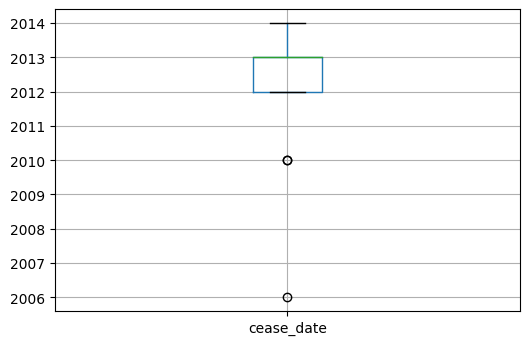

In [33]:
dete_resignations.boxplot('cease_date')
plt.show()

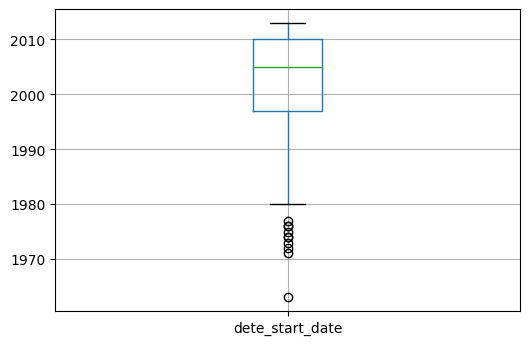

In [34]:
dete_resignations.boxplot('dete_start_date')
plt.show()

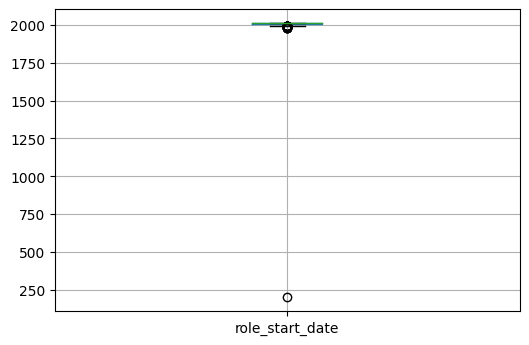

In [35]:
dete_resignations.boxplot('role_start_date')
plt.show()

We can see that in the DETE `role_start_date` column there is only 1 value of `200`, which might've been a type and was actually supposed to be some year in the 2000's, so we can leave it as is since we are not interested in particular years. We only want to check if there are any years which don't make any sense (outliers).

In [36]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

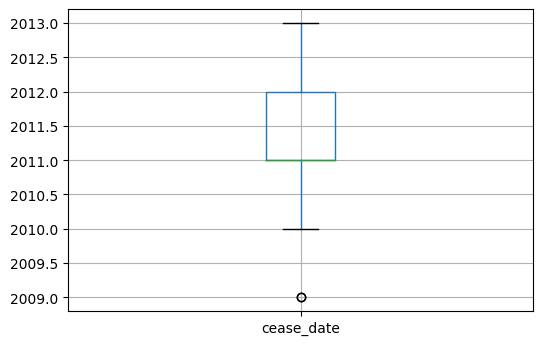

In [37]:
tafe_resignations.boxplot('cease_date')
plt.show()

TAFE looks to be fine.

From the above we concluded that there are no logical inconsistencies with the years.

## Identify years in service

Since one of our goals is to determine:
* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

We need to identify years in service for each person. TAFE already has that information, which is stored in the institute_service columns, but for DETE, we will have to do some calculations.
Let's take a look at all the columns and determine how can we pull that information:

In [38]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separation_type                      311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

Looks like we can create a new column and subtract `dete_start_date` from `cease_date` to get the `institute_service` value:

In [39]:
dete_resignations['cease_date'].isnull().sum()

11

In [40]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [41]:
dete_resignations['institute_service'].value_counts(dropna=False).sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
NaN     38
Name: institute_service, dtype: int64

Now we have another column which can help us to analyze the survey respondents according to their length of employment.

## Identify Dissatisfied Employees


Next step will be to categorize respondents as dissatisfied. We will use the following columns for this categorization:
From `tafe_updated`:
* `Contributing Factors. Dissatisfaction`
* `Contributing Factors. Job Dissatisfaction`

From `dete_updated`:
* `job_dissatisfaction`
* `dissatisfaction_with_the_department`
* `physical_work_environment`
* `lack_of_recognition`
* `lack_of_job_security`
* `work_location`
* `employment_conditions`
* `work_life_balance`
* `workload`

If the respondent indicated any of the above factors caused them to resign, we will mark them as `dissatisfied` in a new column.

In [42]:
tafe_updated['Contributing Factors. Dissatisfaction'].value_counts()

-                                         371
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [43]:
tafe_updated['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      360
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We will create a function that checks:
* if the value is - -> returns `False`
* if the value is `Null` -> returns `Nan`
* anything else -> returns `True`

Then, we will apply that function to `Contributing Factors. Dissatisfaction` & `Contributing Factors. Job Dissatisfaction` columns in `tafe_resignations`, using the `df.applymap()` method.

In [44]:
def update_vals(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True


In [45]:
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

Now, we can create a new column named dissatisffied, which will contain `True` if any of the above 2 columns contains `True` in the same row. If it contains `-`, the value will be `False`, and finally if it contains a `NaN`, the value will be `NaN`. We will use `df.any()` method for this purpose.

In [46]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

In [47]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

We can now see that our new column contains 241 False, 91 True & 8 NaN values. This will help us to determine which respondent resigned due to dissatisfaction of any kind. Let's do the same for `dete_resignations`:

In [48]:
tafe_resignations_up = tafe_resignations.copy()

In [49]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separation_type                      311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

Let's check what kind of data do these columns contain, so we know whether we need to apply any functions, or the data is lready good to go:

In [50]:
dete_resignations['job_dissatisfaction'].value_counts(dropna=False)

False    270
True      41
Name: job_dissatisfaction, dtype: int64

It would take o lot of manual work to check each individiual column, so we can streamline this with a for loop.

In [51]:
columns = dete_resignations.columns

In [52]:
columns = columns[13:27]

In [53]:
columns

Index(['job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload'],
      dtype='object')

In [54]:
for column in columns:
    print(column)
    print(dete_resignations[column].value_counts(dropna=False))

job_dissatisfaction
False    270
True      41
Name: job_dissatisfaction, dtype: int64
dissatisfaction_with_the_department
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64
physical_work_environment
False    305
True       6
Name: physical_work_environment, dtype: int64
lack_of_recognition
False    278
True      33
Name: lack_of_recognition, dtype: int64
lack_of_job_security
False    297
True      14
Name: lack_of_job_security, dtype: int64
work_location
False    293
True      18
Name: work_location, dtype: int64
employment_conditions
False    288
True      23
Name: employment_conditions, dtype: int64
maternity/family
False    268
True      43
Name: maternity/family, dtype: int64
relocation
False    252
True      59
Name: relocation, dtype: int64
study/travel
False    285
True      26
Name: study/travel, dtype: int64
ill_health
False    292
True      19
Name: ill_health, dtype: int64
traumatic_incident
False    300
True      11
Name: traumatic_incident, d

In the cells above, we have checked our columns of interest for the data formatting, and we can see that these columns already contain `True` or `False`, so we do not need to apply any functions to format them. We can go ahead and apply the `df.any()` method to create a `dissatisfied` column:

In [55]:
dete_resignations['dissatisfied'] = dete_resignations[[
    'job_dissatisfaction', 'dissatisfaction_with_the_department',
    'physical_work_environment', 'lack_of_recognition',
    'lack_of_job_security', 'work_location',
    'employment_conditions', 'work_life_balance',
    'workload'
]].any(axis=1, skipna=False)

In [56]:
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [57]:
dete_resignations_up = dete_resignations.copy()

Just to be safe and avoid any warnings, we have created copies of both datasets.

## Combining the Data

To recap, we've accomplished the following:

* Renamed our columns
* Dropped any data not needed for our analysis
* Verified the quality of our data
* Created a new `institute_service` column
* Cleaned the `Contributing Factors` columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way

We should now be ready to combine 2 datasets together.

Before we combine, let's add one more column to each dataset which will make it easier to distinguish where the data comes from when we wil have only 1 dataset. We will add 1 column called `institute` which will contain the institute name in all the rows:

In [58]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [59]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [60]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

There are still a lot of columns which are not important for our analysis, and all of the contributing factors we have already categorized in the `dissatisfied column`. Therefore, we can go ahead and drop all columns that have less than 500 non-null values:

In [61]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [62]:
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
separation_type      651
institute            651
dtype: int64

We are now left with 8 columns, and these shluld give us sufficient information for the analysis.

## Cleaning the Institute Service Column

Before we can start the analysis, there is actually one more thing to do - clean up the `institute_service` column. If we take a look at it, we can see there are some values containing a `-` :

In [63]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


First, we will convert the column values to string:

In [64]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str')

Create a checkpoint:

In [65]:
combined_final = combined_updated.copy()

Then, we will use the `str.extract()` with regex to extract groups of digit characters in a string. More about this exact method can be found on [DataQuest Forum](https://community.dataquest.io/t/str-extract-r-d-can-someone-explain-how-this-code-works/3232).

Asfter we exctract the digits, we can convert back to float.

In [66]:
combined_final['institute_service_up'] = combined_final['institute_service'].str.extract(r'(\d+)')
combined_final['institute_service_up'] = combined_final['institute_service_up'].astype('float')

In [67]:
combined_final['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

The above check shows us all the values are numerical, without any special characters. The column has been cleaned.

## Grouping Respondents in Career Stage Groups

Now we will group all the respondents in career groups, using the following criteria:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

These groups are based on the following article, but slightly modified: [Age is Just a Number: Engage Employees by Career Stage, Too](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage).

First, we create a function that returns values as per the above criteria:

In [68]:
def grouping(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

Then, we apply the function on the `institute_service_up` column, and assign the result to a new column named `service_cat`

In [69]:
combined_final['service_cat'] = combined_final['institute_service_up'].apply(grouping)

In [70]:
combined_final['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Perform Initial Analysis


In [71]:
combined_final['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We will replace 8 missing values with the value that appears most frequently in the column - False, using the `df.fillna()` method:

In [72]:
combined_final.fillna(value={'dissatisfied' : False}, inplace=True)

In [73]:
combined_final['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

Now we can creata pivot table, which is easy to do since pivot table treats bool values as 0's or 1's.

In [74]:
dissatisfied_pivot = combined_final.pivot_table(index='service_cat', values='dissatisfied').sort_values(by='dissatisfied')

In [75]:
dissatisfied_pivot

,dissatisfied
service_cat,
New,0.295337
Experienced,0.343023
Veteran,0.485294
Established,0.516129


Let's plot a bar chart:

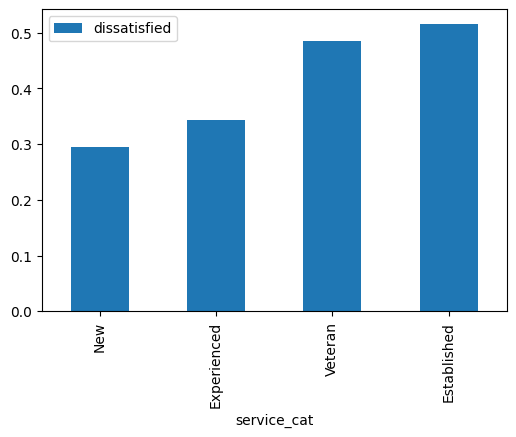

In [76]:
dissatisfied_pivot.plot(kind='bar')
plt.show()

We can observe that resignations due to dissatisfiction are more often with employees with 7+ years of experience.

In [77]:
combined_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    651 non-null    float64
 1   separation_type       651 non-null    object 
 2   cease_date            635 non-null    float64
 3   position              598 non-null    object 
 4   employment_status     597 non-null    object 
 5   gender                592 non-null    object 
 6   age                   596 non-null    object 
 7   institute_service     651 non-null    object 
 8   dissatisfied          651 non-null    bool   
 9   institute             651 non-null    object 
 10  institute_service_up  563 non-null    float64
 11  service_cat           563 non-null    object 
dtypes: bool(1), float64(3), object(8)
memory usage: 56.7+ KB


In [78]:
combined_final['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
26  30           32
36  40           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [79]:
combined_final['age']

0       36-40
1       41-45
2       31-35
3       46-50
4       31-35
        ...  
646    21  25
647     51-55
648       NaN
649     51-55
650    26  30
Name: age, Length: 651, dtype: object

## Age Groups

Next, we will categorize the age column into Age Groups, following the [logic](https://vervoe.com/age-diversity/):

* 60-75 : Baby Boomers
* 40 - 59 : Generation X
* 26 - 39 : Millenials
* 18 - 25 : Generation Z

In [128]:
combined_age = combined_final.copy()

In [129]:
combined_age['age'] = combined_age['age'].str.replace('or older', '').str.replace('or younger', '').str.strip().str.replace('  ', '-').str.split('-')

In [130]:
combined_age['age'].value_counts(dropna=False)

[41, 45]    93
[46, 50]    81
[36, 40]    73
[51, 55]    71
[26, 30]    67
[21, 25]    62
[31, 35]    61
NaN         55
[56]        29
[56, 60]    26
[61]        23
[20]        10
Name: age, dtype: int64

In [131]:
combined_age['age_modified'] = combined_age['age'].str[-1]

In [132]:
combined_age['age_modified'].value_counts(dropna=False)

45     93
50     81
40     73
55     71
30     67
25     62
35     61
NaN    55
56     29
60     26
61     23
20     10
Name: age_modified, dtype: int64

In [133]:
combined_age['age_modified'] = combined_age['age_modified'].astype(float)

In [134]:
combined_age['age_modified'].fillna(value=round(combined_age['age_modified'].mean()), inplace=True)

In [135]:
combined_age['age_modified'].value_counts()

45.0    93
50.0    81
40.0    73
55.0    71
30.0    67
25.0    62
35.0    61
43.0    55
56.0    29
60.0    26
61.0    23
20.0    10
Name: age_modified, dtype: int64

In [136]:
def age_group(val):
    if val >= 60:
        return 'Baby Boomer'
    elif 40 <= val <= 59:
        return 'Generation X'
    elif 26 <= val <= 39:
        return 'Millenial'
    elif val < 26:
        return 'Generation Z'

In [137]:
combined_age['age_group'] = combined_age['age_modified'].apply(age_group)

In [138]:
combined_age['age_group'].value_counts()

Generation X    402
Millenial       128
Generation Z     72
Baby Boomer      49
Name: age_group, dtype: int64

In [142]:
age_pivot = combined_age.pivot_table(index='age_group', values='dissatisfied').sort_values(by='dissatisfied')

In [143]:
age_pivot

,dissatisfied
age_group,
Generation Z,0.291667
Generation X,0.350746
Millenial,0.398438
Baby Boomer,0.551020


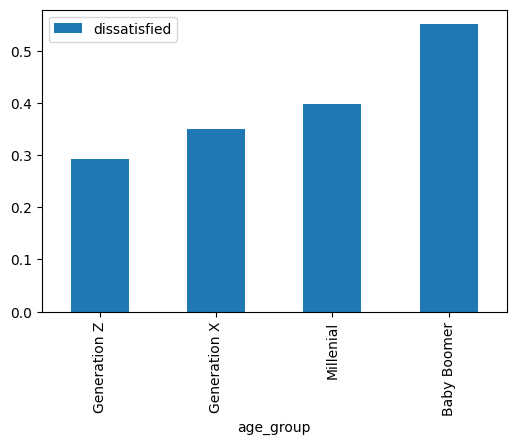

In [144]:
age_pivot.plot(kind='bar')
plt.show()

We can see that Baby Boomer group is mostly resigning due to some kind of dissatisfaction, while the youngest (Gen Z), tends to resign less due to dissatisfaction.